In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# prepare data

In [45]:
data = pd.read_csv('../data_sets/taitanic/train.csv')
intrested_columns = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']
data = data[intrested_columns]
data.Sex = data.Sex.map({'male': 1, 'female': 0})

data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [46]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [47]:
from tqdm import tqdm
from sklearn.cluster import KMeans
cluster_kmean = KMeans(n_clusters=3,init='k-means++',random_state=33)

In [48]:
cluster_kmean.fit(data)

KMeans(n_clusters=3, random_state=33)

In [49]:
pd.DataFrame(cluster_kmean.cluster_centers_,columns=intrested_columns,index=["Cluster A","Cluster B","Cluster C"])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Cluster A,0.356564,2.423015,0.670989,28.919368,0.487844,0.398703,19.026803
Cluster B,0.712766,1.053191,0.393617,34.637447,0.691489,0.648936,122.291044
Cluster C,1.000000,1.000000,0.666667,35.333333,0.000000,0.333333,512.329200


In [50]:
cluster_kmean.inertia_

589037.6826285352

In [51]:
dict_inertia_ = {}
for i in tqdm(range(2,15)):
    cluster_kmean = KMeans(n_clusters=i,init='k-means++',random_state=33)
    cluster_kmean.fit(data)
    dict_inertia_[i] = cluster_kmean.inertia_

dict_inertia_

100%|██████████| 13/13 [00:00<00:00, 118.39it/s]


{2: 919398.2327366662,
 3: 589037.6826285352,
 4: 316341.4084026173,
 5: 244266.53661327955,
 6: 165582.14537886373,
 7: 127475.89526020504,
 8: 114383.95905758582,
 9: 108189.40723327937,
 10: 92818.13304031597,
 11: 83460.58950832437,
 12: 73674.5031305134,
 13: 65184.63637367209,
 14: 60872.50437161508}

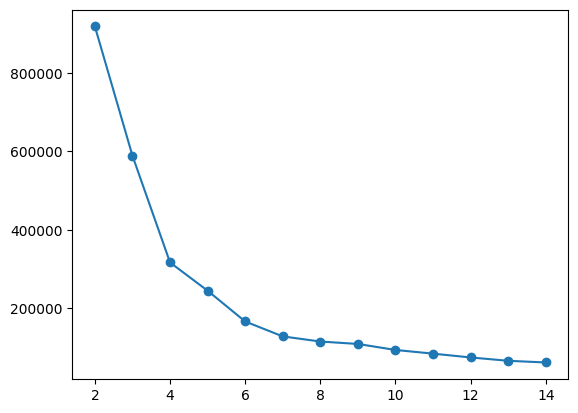

In [52]:
plt.scatter(x=dict_inertia_.keys(),y=dict_inertia_.values(),linewidths=1,linestyle='solid',alpha=1)
plt.plot(dict_inertia_.keys(),dict_inertia_.values(),linestyle='solid',alpha=1)